# Observable Trends:

There is one parameter which is missing in the input data - "Duration of the ride". Having this data would have helped to draw more solid conclusions. All the points below would assume that the average ride duration across cities is more or less the same.

1. The average fare in rural areas is far too high as compared to the Urban and Suburban counterpart. This might be because of higher fares per ride.

2. The total number of rides in rural areas is significantly low as well as compared to the Urban and Suburban counterpart. This trend indicates that people in such areas might be finding the fares significantly higher which might not match their spending power. The total number of rides might be low because of reduced population in such areas as well.

3. The number of drivers are less in rural areas. 

Proposal/Suggestion (for Rural areas):

1. Increasing and promoting more drivers in rural areas by giving appropriate concessions and discounts might help solve the problems highlighted in points above to some extent. More drivers would eventually bring down the demand under control which would reduce the average fare(surge pricing). Eventually, people would start riding pyber more often which would increase the total number of rides and help with more revenue from these areas. Even if the total revenue does not go up by a huge margin immediately, Pyber would still have a bigger and happier clientele which would help in the long run.

2. If the drivers and fares are to be kept the same, Company can think of implementing car pooling on Pyber where each ride will be shared by multiple peoples. This can be done on a pilot basis in rural areas. Pooling would reduce fare burden on individuals while generating almost the same revenue with same number of drivers. This would also be a good test to check the sentiments and thinking of the crowd in rural areas if they are open to this option.


In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_df = ride_df.merge(city_df, on = "city")

# Display the data table for preview
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

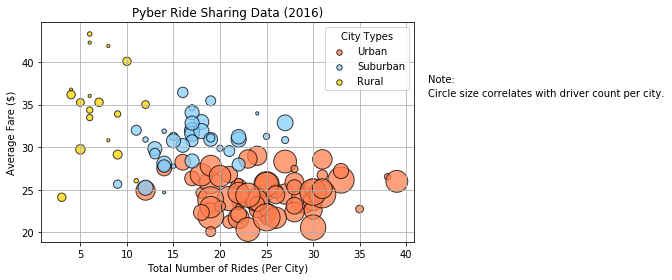

In [2]:
# Obtain the x and y coordinates for each of the three city types

#Grouping the merged dataset by city types- Urban, Suburban, Rural
city_type_grouped_df = city_ride_df.groupby(["type"])

#Grouping the Urban cities further by individual city
urban_city_grouped = city_type_grouped_df.get_group("Urban").groupby("city")

#Grouping the Suburban cities further by individual city
suburban_city_grouped = city_type_grouped_df.get_group("Suburban").groupby("city")

#Grouping the Rural cities further by individual city
rural_city_grouped = city_type_grouped_df.get_group("Rural").groupby("city")

#Finding the Average Fare, Total Rides and Driver Count for Urban cities
urban_city_fares = urban_city_grouped["fare"].mean()
urban_city_rides = urban_city_grouped["ride_id"].size()
urban_city_drivers = urban_city_grouped["driver_count"].mean()

#Finding the Average Fare, Total Rides and Driver Count for Suburban cities
suburban_city_fares = suburban_city_grouped["fare"].mean()
suburban_city_rides = suburban_city_grouped["ride_id"].size()
suburban_city_drivers = suburban_city_grouped["driver_count"].mean()

#Finding the Average Fare, Total Rides and Driver Count for Rural cities
rural_city_fares = rural_city_grouped["fare"].mean()
rural_city_rides = rural_city_grouped["ride_id"].size()
rural_city_drivers = rural_city_grouped["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(urban_city_rides, urban_city_fares, marker="o", s=urban_city_drivers*10, facecolors = 'coral' , edgecolors="black", alpha=0.75, label="Urban")
plt.scatter(suburban_city_rides, suburban_city_fares, marker="o", s=suburban_city_drivers*10, facecolors = 'lightskyblue' , edgecolors="black", alpha=0.75, label="Suburban")
plt.scatter(rural_city_rides, rural_city_fares, marker="o",  s=rural_city_drivers*10, facecolors= 'gold' , edgecolors="black", alpha=0.75, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.tight_layout()
plt.grid()

# Create a legend
legend = plt.legend(loc = "best",title = "City Types")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.figtext(1.0,0.7, "Note:")
plt.figtext(1.0,0.65, "Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("../Images/PyberAnalysis.png")


In [3]:
# Show plot
plt.show()

## Total Fares by City Type

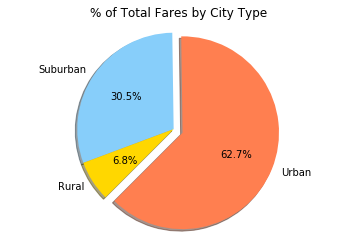

In [4]:
# Calculate Type Percents

#Extracting unique city types in a list
city_types = city_ride_df["type"].unique()

#Creating a list to hold Percent fare for each city type
perFare_City_Type = [city_type_grouped_df.get_group(city_type)["fare"].sum()/city_ride_df["fare"].sum()*100 for city_type in city_types]

#Setting the required colors for display
colors = ["coral","lightskyblue","gold"]

#Setting explode
explode = (0.1,0,0)

# Build Pie Chart
plt.pie(perFare_City_Type, explode=explode, labels=city_types, colors=colors, autopct="%1.1f%%",shadow=True, startangle=225)
plt.title("% of Total Fares by City Type")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save Figure
plt.savefig("../Images/FaresCityType.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

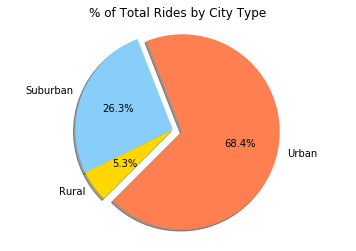

In [6]:
# Calculate Ride Percents

#Creating a list to hold Percent Ride for each city type
perRide_City_Type = [city_type_grouped_df.get_group(city_type)["ride_id"].count()/city_ride_df["ride_id"].count()*100 for city_type in city_types]

# Build Pie Chart
plt.pie(perRide_City_Type, explode=explode, labels=city_types, colors=colors, autopct="%1.1f%%",shadow=True, startangle=225)
plt.title("% of Total Rides by City Type")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save Figure
plt.savefig("../Images/RidesCityType.png")



In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

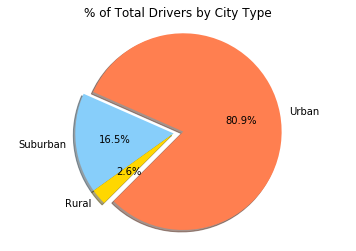

In [8]:
# Calculate Driver Percents

#Grouping the data from city_data.csv by city types
city_driver_grouped_df = city_df.groupby("type")

#Creating a list to hold Percent Drivers for each city type
perDrivers_City_Type = [city_driver_grouped_df.get_group(city_type)["driver_count"].sum()/city_df["driver_count"].sum()*100 for city_type in city_types]

# Build Pie Charts
plt.pie(perDrivers_City_Type, explode=explode, labels=city_types, colors=colors, autopct="%1.1f%%",shadow=True, startangle=225)
plt.title("% of Total Drivers by City Type")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save Figure
plt.savefig("../Images/DriversCityType.png")


In [9]:
# Show Figure
plt.show()